In [ ]:
# Articles
# https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
# https://towardsdatascience.com/time-series-forecasting-with-a-sarima-model-db051b7ae459
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statsmodels.api as sm
import datetime as dt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv("../data/state-daily-stats.csv", parse_dates=['date'])
data.drop(columns={"Unnamed: 0"}, inplace=True)

In [3]:
for index, row in data.iterrows():
    date = dt.datetime.strptime(row["date"], "%Y-%d-%m")
    date2 = dt.datetime.strftime(date, "%m-%d-%Y")
    data.at[index, "date"] = date2

In [4]:
data["date"] = pd.to_datetime(data["date"])
daily_new_cases = pd.DataFrame(data[["date","daily_new_cases"]])

In [5]:
daily_new_cases

,date,daily_new_cases
0,2020-01-21,1
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,1
4,2020-01-25,1
...,...,...
404,2021-02-28,50925
405,2021-03-01,56672
406,2021-03-02,57789
407,2021-03-03,66714


In [7]:
daily_new_cases = daily_new_cases[daily_new_cases["date"] >= dt.datetime(2020,3,1)]
for index, row in daily_new_cases.iterrows():
    date = row["date"]
    new_date = dt.datetime.strftime(date, "%m-%d-%Y")
    daily_new_cases.at[index, "date"] = new_date

C:\Users\coled\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [8]:
daily_new_cases

,date,daily_new_cases
40,03-01-2020,18
41,03-02-2020,16
42,03-03-2020,21
43,03-04-2020,36
44,03-05-2020,67
...,...,...
404,02-28-2021,50925
405,03-01-2021,56672
406,03-02-2021,57789
407,03-03-2021,66714


In [9]:
daily_new_cases.set_index("date", inplace=True)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

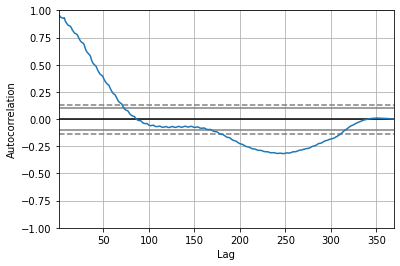

In [15]:
autocorrelation_plot(daily_new_cases)

In [20]:
test_df = np.log(daily_new_cases)
test_df.fillna(0, inplace=True)

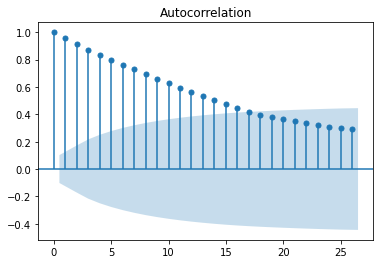

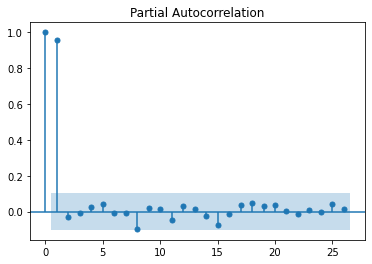

In [21]:
ACF = plot_acf(test_df)
PACF = plot_pacf(test_df)

In [22]:
result = adfuller(test_df, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -3.3196529392354193
p-value: 0.01402251976095639


In [24]:
no_log = adfuller(daily_new_cases, autolag='AIC')
print(f'ADF Statistic: {no_log[0]}')
print(f'p-value: {no_log[1]}')

ADF Statistic: -1.4107354946465414
p-value: 0.5771187034544727


In [80]:
training = test_df[:250]
testing = test_df[250:]
# training = test_df[:250]
# training.plot()

In [ ]:
# training.reset_index(inplace=True)

In [ ]:
# date_times = []

# for x in testing: 
# #     date_times.append([dt.datetime.strftime(x, "%Y"), dt.datetime.strftime(x,"%m") , dt.datetime.strftime(x,"%d")])
#     date_times.append(dt.datetime.strftime(x, "%Y-%m-%d"))

In [ ]:
# for x in test:
#     print(x)

In [81]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

model = ARIMA(training, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.daily_new_cases   No. Observations:                  249
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 100.778
Method:                       css-mle   S.D. of innovations              0.161
Date:                Sat, 06 Mar 2021   AIC                           -191.555
Time:                        18:03:30   BIC                           -173.968
Sample:                    03-02-2020   HQIC                          -184.476
                         - 11-05-2020                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0806      0.073      1.104      0.270      -0.063       0.224
ar.L1.D.daily_new_cases     0.9886      0.012     79.204      0.000       0.964       1.013


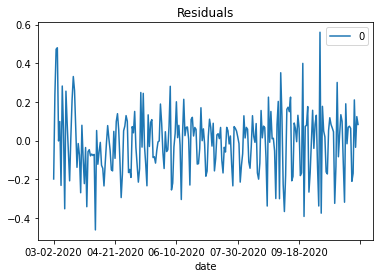

In [33]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="Residuals")
plt.show()

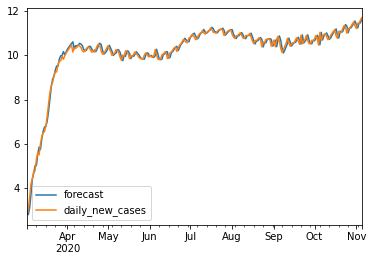

In [34]:
model_fit.plot_predict()
plt.show()

In [ ]:
# for x in testing_dates:
#     prediction = model_fit.predict(x)
#     print(prediction)

# for x in testing_dates:
#     print(x)

In [37]:
model_1_pred = model_fit.predict(start="2020-11-06") 

In [38]:
for x in model_1_pred:
    print(x)

0.042238885865059694


In [ ]:
model_1_pred[0]

In [ ]:
# training = log_daily_new_cases[:330]
# testing = log_daily_new_cases[330:]

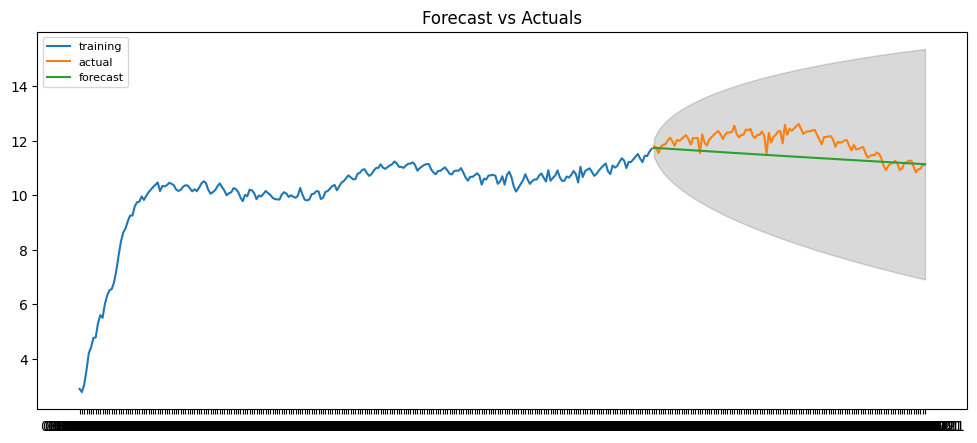

In [41]:
model = ARIMA(training, order=(1,0,2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(119, alpha=0.05)  

# Forecast
# fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=testing.index)
lower_series = pd.Series(conf[:, 0], index=testing.index)
upper_series = pd.Series(conf[:, 1], index=testing.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(training, label='training')
plt.plot(testing, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### fitted.summary()

In [42]:
import pmdarima as pm

In [43]:
amodel = pm.auto_arima(training, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=7,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(amodel.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-154.750, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1875.167, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1541.481, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-155.157, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1229.393, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-153.649, Time=0.26 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-156.175, Time=0.24 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=996.562, Time=0.22 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-152.997, Time=0.40 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-155.781, Time=0.47 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0]          
Total fit time: 2.325 seconds
                               SARIMAX Results                                
Dep. Variable:      

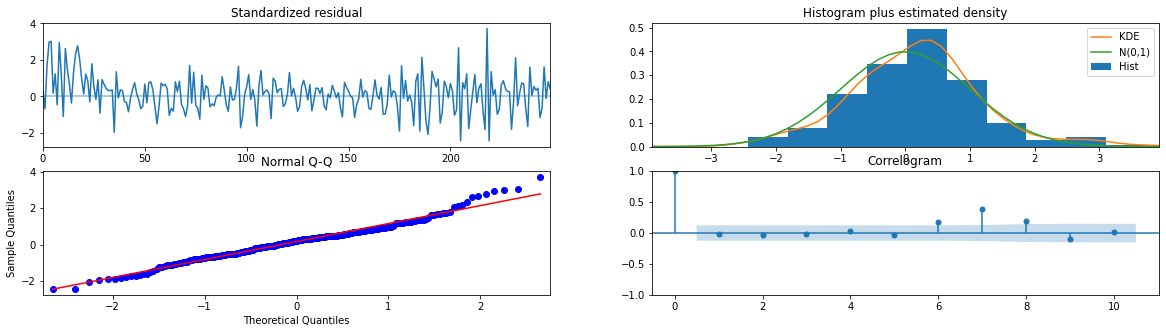

In [44]:
amodel.plot_diagnostics(figsize=(20,5))
plt.show()

In [45]:
n_periods = 119
arima_predictions = amodel.predict(n_periods=n_periods)

In [46]:
arima = []
for x in arima_predictions:
    p = np.expm1(x)
    arima.append(round(p))
    
arima

[124182,
 126806,
 127243,
 126673,
 126106,
 125542,
 124980,
 124421,
 123865,
 123312,
 122761,
 122213,
 121667,
 121124,
 120584,
 120047,
 119512,
 118979,
 118449,
 117922,
 117398,
 116875,
 116356,
 115839,
 115324,
 114812,
 114302,
 113795,
 113290,
 112788,
 112288,
 111790,
 111295,
 110802,
 110312,
 109824,
 109338,
 108855,
 108374,
 107895,
 107419,
 106944,
 106472,
 106003,
 105535,
 105070,
 104607,
 104147,
 103688,
 103232,
 102778,
 102326,
 101876,
 101428,
 100983,
 100540,
 100098,
 99659,
 99222,
 98787,
 98354,
 97923,
 97495,
 97068,
 96643,
 96220,
 95800,
 95381,
 94964,
 94550,
 94137,
 93726,
 93317,
 92910,
 92505,
 92102,
 91701,
 91302,
 90904,
 90509,
 90115,
 89723,
 89334,
 88945,
 88559,
 88175,
 87792,
 87411,
 87032,
 86655,
 86280,
 85906,
 85534,
 85164,
 84796,
 84429,
 84064,
 83701,
 83339,
 82980,
 82621,
 82265,
 81910,
 81557,
 81206,
 80856,
 80508,
 80161,
 79816,
 79473,
 79131,
 78791,
 78453,
 78116,
 77780,
 77446,
 77114,
 76784,

In [143]:
arima_df = pd.DataFrame(arima)
arima_df.rename(columns={0: "arima_model"}, inplace=True)

In [144]:
# for index, row in arima_df.iterrows():
#     x = row[0]
#     testing.at[index, "arima_daily"] = np.expm1(x))

In [145]:
# model_1_armia = pd.DataFrame(testing["arima_daily"])

In [146]:
testing

,daily_new_cases
date,
11-06-2020,11.796773
11-07-2020,11.743497
11-08-2020,11.546515
11-09-2020,11.778676
11-10-2020,11.847610
...,...
02-28-2021,10.838109
03-01-2021,10.945036
03-02-2021,10.964554


In [147]:
arima_analysis = testing.reset_index()

for index, row in arima_analysis.iterrows():
    x = row[1]
    arima_analysis.at[index, "original_daily"] = np.expm1(x)

In [148]:
arima_analysis

,date,daily_new_cases,original_daily
0,11-06-2020,11.796773,132822.0
1,11-07-2020,11.743497,125931.0
2,11-08-2020,11.546515,103415.0
3,11-09-2020,11.778676,130440.0
4,11-10-2020,11.847610,139749.0
...,...,...,...
114,02-28-2021,10.838109,50924.0
115,03-01-2021,10.945036,56671.0
116,03-02-2021,10.964554,57788.0
117,03-03-2021,11.108170,66713.0


In [149]:
arima_analysis = pd.merge(arima_analysis, arima_df, left_index=True, right_index=True)
arima_analysis.set_index("date", inplace=True)
arima_analysis.drop(columns="daily_new_cases", inplace=True)

<AxesSubplot:xlabel='date'>

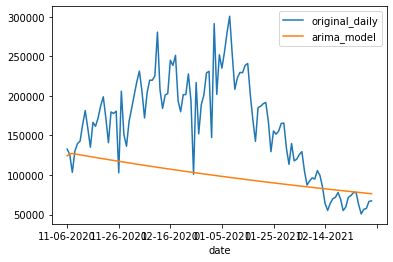

In [150]:
arima_analysis.plot()

<AxesSubplot:xlabel='date'>

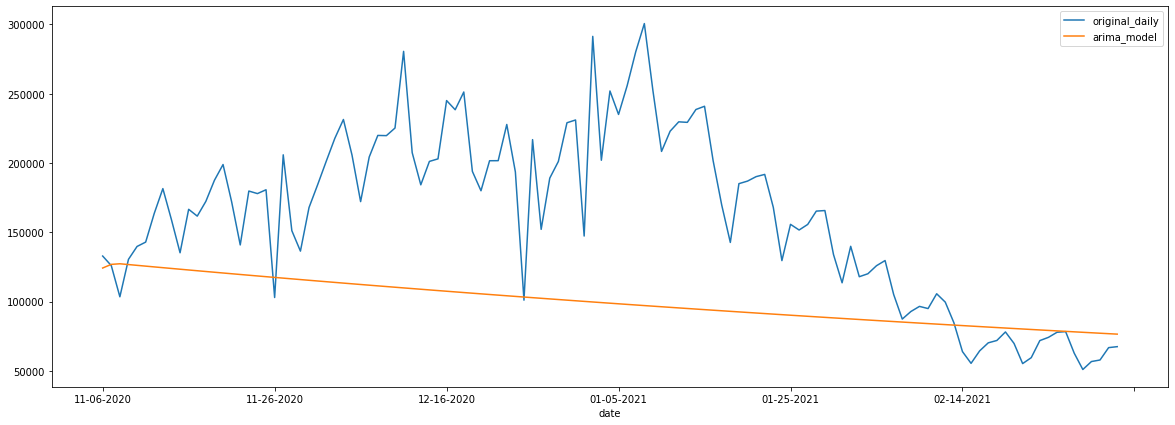

In [152]:
arima_analysis.plot(figsize=(20, 7))

# Preferred Model: Seasonal, Daily

In [135]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(training, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=7,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=-269.325, Time=0.36 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=-165.405, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=-270.686, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=-268.542, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=-191.161, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=-275.204, Time=0.58 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=-275.198, Time=0.73 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=-276.443, Time=0.22 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=-269.762, Time=0.14 sec
 ARIMA(1,1,0)(1,1,2)[7]             : AIC=-274.972, Time=1.34 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=-275.029, Time=0.32 sec
 ARIMA(1,1,0)(2,1,2)[7]             : AIC=inf, Time=1.25 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=-274.282, Time=0.19 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=-279.799, Time=0.32 sec
 ARIMA(2,1,0)(0,1,1)[7]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  250
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 7)   Log Likelihood                 169.008
Date:                           Sat, 06 Mar 2021   AIC                           -324.017
Time:                                   18:22:39   BIC                           -299.594
Sample:                                        0   HQIC                          -314.179
                                           - 250                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9834      0.018     54.949      0.000       0.948       1.018
ma.L1         -1.2321      0.044    -28.089      0.000      -1.318      -1.146
ma.L2          0.3782      0.043      8.727      0.000       0.293       0.463
ar.S.L7       -0.7919      0.169     -4.681      0.000      -1.124      -0.460
ma.S.L7       -0.1876      0.210     -0.893      0.372      -0.599       0.224
ma.S.L14      -0.5326      0.183     -2.908      0.004      -0.891      -0.174
sigma2         0.0140      0.001     15.727      0.000       0.012       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                89.38
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.01
Prob(H) (two-sided):                  0.38   Kurtosis:                         5.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [153]:
n_periods = 119
predictions_seasonal = smodel.predict(n_periods=n_periods)

<AxesSubplot:>

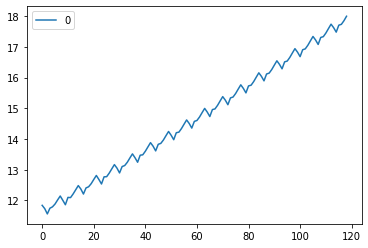

In [160]:
pd.DataFrame(predictions_seasonal).plot()

In [164]:
arima_analysis

,original_daily,arima_model
date,,
11-06-2020,132822.0,124182
11-07-2020,125931.0,126806
11-08-2020,103415.0,127243
11-09-2020,130440.0,126673
11-10-2020,139749.0,126106
...,...,...
02-28-2021,50924.0,77780
03-01-2021,56671.0,77446
03-02-2021,57788.0,77114


In [161]:
# predictions_df = pd.DataFrame(predictions_seasonal)

predictions_list = []

for x in predictions_seasonal:
    prediction = np.expm1(x)
    predictions_list.append(round(prediction))

# pd.DataFrame(np.expm1(predictions_seasonal))

# predicted_dates = []

# date = dt.date.today() - dt.timedelta(days=1)

# for x in predictions_seasonal:
#     date += dt.timedelta(days=1)
#     predicted_dates.append(date)

In [169]:
sarima_model = pd.DataFrame(predictions_list)
sarima_model.rename(columns={0:"sarima_model"}, inplace=True)

In [170]:
sarima_model

,sarima_model
0,138867
1,124609
2,104994
3,126359
4,132237
...,...
114,39145977
115,49059404
116,50464318
117,56761915


In [166]:
arima_analysis.reset_index(inplace=True)

In [175]:
model_analyses = pd.merge(arima_analysis, sarima_model, left_index=True, right_index=True)

<AxesSubplot:>

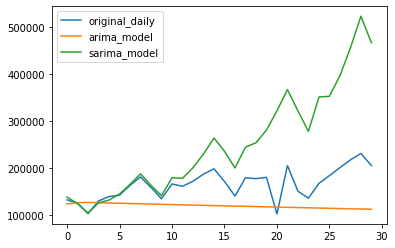

In [179]:
model_analyses[:30].plot()

In [156]:
predictions_df = pd.DataFrame({"future_date":predicted_dates, "predicted_daily_new_cases":predictions_list})
predictions_df.set_index("future_date", inplace=True)

In [158]:
predictions_df

,predicted_daily_new_cases
future_date,
2021-03-06,138867
2021-03-07,124609
2021-03-08,104994
2021-03-09,126359
2021-03-10,132237
...,...
2021-06-28,39145977
2021-06-29,49059404
2021-06-30,50464318


In [ ]:
predictions_df.to_csv("../data/daily_new_cases_predicitions.csv")

In [ ]:
smodel.plot_diagnostics(figsize=(7,5))

# Inferior Model Below

In [ ]:
import pmdarima as pm
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("../data/state-daily-stats.csv", parse_dates=['date'])
data.drop(columns={"Unnamed: 0"}, inplace=True)
for index, row in data.iterrows():
    date = dt.datetime.strptime(row["date"], "%Y-%d-%m")
    date2 = dt.datetime.strftime(date, "%m-%d-%Y")
    data.at[index, "date"] = date2

In [ ]:


# #############################################################################
# Load the data and split it into separate pieces
data = pm.datasets.load_wineind()
train, test = model_selection.train_test_split(log_daily_new_cases, train_size=250)

# Fit a simple auto_arima model
arima = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [ ]:
final_tests = arima.predict(n_periods=30)

In [ ]:
np.expm1(final_tests)